# PyTorch. Основы: синтаксис, torch.cuda и torch.autograd

## Задание 7.1

In [ ]:
import numpy as np
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt

### Задача 1

1). Создайте два вещественных тензора: `a` размером (3, 4) и `b` размером (12,)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (2, 2, 3)  
3). Выведите первый столбец матрицы `a` с помощью индексации

In [ ]:
a = torch.FloatTensor(3,4)
a.shape

torch.Size([3, 4])

In [ ]:
b = torch.FloatTensor(12,)
b.shape

torch.Size([12])

In [ ]:
c = b.view(2,2,3)
c.shape

torch.Size([2, 2, 3])

In [ ]:
a[:,0]

tensor([6.7333e+22, 6.1972e-04, 4.7881e+22])

### Задача 2

1). Создайте два вещественных тензора: `a` размером (5, 2) и `b` размером (1,10)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (5, 2)  
3). Произведите все арифметические операции с тензорами `a` и `c`

In [ ]:
a = torch.FloatTensor(5,2)
b = torch.FloatTensor(1,10)
c = b.view(5,2)

In [ ]:
print(a.add(c))
print(a.sub(c))
print(a.mul(c))
print(a.div(c))

tensor([[ 2.6083e+20,  7.6732e-41],
        [-4.9810e+23,  6.1766e-41],
        [ 1.5835e-43,  0.0000e+00],
        [ 6.7262e-44,  3.0883e-41],
        [-2.7319e+23,  3.0883e-41]])
tensor([[ 2.6083e+20, -1.4966e-41],
        [ 2.9849e+22,  0.0000e+00],
        [ 1.5554e-43,  0.0000e+00],
        [ 6.7262e-44, -3.0883e-41],
        [-2.7319e+23,  3.0883e-41]])
tensor([[-1.6321e-07,  0.0000e+00],
        [        inf,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [-1.1485e-21,  0.0000e+00]])
tensor([[    -inf,   0.6736],
        [  0.8869,   1.0000],
        [112.0000,      nan],
        [     inf,   0.0000],
        [    -inf,      inf]])


### Задача 3

1). Создайте тензор *целых чисел* `images` размерности (100, 200, 200, 3) (можно интерпретировать это как 100 картинок размера 200х200 с тремя цветовыми каналами, то есть 100 цветных изображений 200х200). Заполните его нулями  

2). Сделайте так, чтобы у $i$-ой по порядку картинки была нарисована белая полоса толщиной два пикселя в строках, которые соответствуют номеру картинки. Например, у 3-ей по порядку картинки белая полоска будет занимать 6 и 7 строки, у 99 - 198 и 199. Сделать белую строку можно, записав в ячейки тензора число 255 (по всем трём каналам). Выведите несколько примеров с помощью `pylot`  

3). Посчитайте среднее тензора `images` по 1-ой оси (по сути - средняя картинка), умножьте полученный тензор на 70. Нарисуйте с помощью `pyplot`, должна получиться серая картинка (при взятии среднего нужно привести тензор к float с помощью `.float()`, при отрисовке обратно к int с помощью `.int()`)

In [ ]:
img_tensor = torch.IntTensor(100, 200, 200, 3)
img_tensor.shape

torch.Size([100, 200, 200, 3])

In [ ]:
for i in range(len(img_tensor)):
    img_tensor[i][i*2,:] = torch.IntTensor([255,255,255])
    img_tensor[i][min(199, i*2+1),:] = torch.IntTensor([255,255,255])

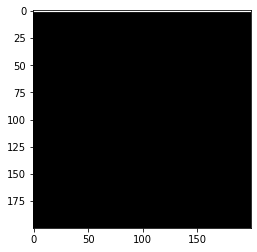

In [ ]:
plt.imshow(img_tensor[0])

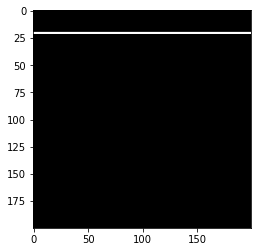

In [ ]:
plt.imshow(img_tensor[10])

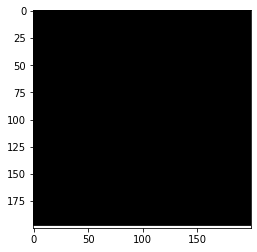

In [ ]:
plt.imshow(img_tensor[99])

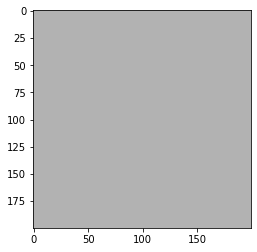

In [ ]:
grey_img = torch.mean(img_tensor.float(), dim=0).mul(70).int()
plt.imshow(grey_img)

### Задача 4

- В Colab нажмите в меню сверху: `Runtime` -> `Change Runtime Type` -> `GPU`, где изначально стоит `None` (`Среда выполнение` - `Сменить среду выполнения`)
- Объявите тензор `a` размера (2, 3, 4) и тензор `b` размера (1, 8, 3) на GPU, иницилизируйте их случайно равномерно (`.uniform_()`)
- Затем измените форму тензора `b`, чтобы она совпадала с формой тензора `a`, получите тензор `c`  
- Переместите `c` на CPU, переместите `a` на CPU  
- Оберните их в `Variable()`
- Объявите тензор `L = torch.mean((c - a) `**` 2)` и посчитайте градиент `L` по `c` ( то есть $\frac{\partial{L}}{\partial{c}})$
- Выведите градиент `L` по `c`

In [ ]:
a = torch.FloatTensor(2,3,4).uniform_()
b = torch.FloatTensor(1,8,3).uniform_()

In [ ]:
c = b.view(2,3,4).cpu()

In [ ]:
a = a.cpu()

In [ ]:
print(c.is_cuda)
print(a.is_cuda)

False
False


In [ ]:
a = Variable(a, requires_grad=True)
c = Variable(c, requires_grad=True)

In [ ]:
L = torch.mean((c - a) ** 2)

In [ ]:
L.backward()

In [ ]:
c.grad

tensor([[[ 0.0285,  0.0046,  0.0505,  0.0433],
         [-0.0211,  0.0066, -0.0370, -0.0585],
         [ 0.0260, -0.0219,  0.0116,  0.0818]],

        [[-0.0373,  0.0623, -0.0392,  0.0401],
         [ 0.0310,  0.0419, -0.0171,  0.0018],
         [ 0.0308, -0.0493,  0.0655, -0.0429]]])